ubyte_to_csv

In [8]:
import os
import struct
import numpy as np
import pandas as pd

def read_idx(filename):
    with open(filename, 'rb') as f:
        zero, data_type, dims = struct.unpack('>HBB', f.read(4))
        shape = tuple(struct.unpack('>I', f.read(4))[0] for _ in range(dims))
        return np.frombuffer(f.read(), dtype=np.uint8).reshape(shape)

base_path = "/Users/rishimule/PycharmProjects/PythonProject"

# Paths to the MNIST dataset files
train_images_path = os.path.join(base_path, 'train-images.idx3-ubyte')
train_labels_path = os.path.join(base_path, 'train-labels.idx1-ubyte')
test_images_path = os.path.join(base_path, 't10k-images.idx3-ubyte')
test_labels_path = os.path.join(base_path, 't10k-labels.idx1-ubyte')

print("Train Images Path:", train_images_path)
print("Train Labels Path:", train_labels_path)
print("Test Images Path:", test_images_path)
print("Test Labels Path:", test_labels_path)

# Load the data
train_images = read_idx(train_images_path)
train_labels = read_idx(train_labels_path)
test_images = read_idx(test_images_path)
test_labels = read_idx(test_labels_path)

# Combine the training data
train_combined = pd.DataFrame(train_images.reshape(train_images.shape[0], -1))
train_combined['label'] = train_labels

# Combine the testing data
test_combined = pd.DataFrame(test_images.reshape(test_images.shape[0], -1))
test_combined['label'] = test_labels

# Concatenate train and test datasets
full_combined = pd.concat([train_combined, test_combined], ignore_index=True)

# Save the combined DataFrame as a single CSV file
combined_csv_path = os.path.join(base_path, 'mnist_combined.csv')
full_combined.to_csv(combined_csv_path, index=False)

print(f"Combined dataset saved to: {combined_csv_path}")


Train Images Path: /Users/rishimule/PycharmProjects/PythonProject/train-images.idx3-ubyte
Train Labels Path: /Users/rishimule/PycharmProjects/PythonProject/train-labels.idx1-ubyte
Test Images Path: /Users/rishimule/PycharmProjects/PythonProject/t10k-images.idx3-ubyte
Test Labels Path: /Users/rishimule/PycharmProjects/PythonProject/t10k-labels.idx1-ubyte
Combined dataset saved to: /Users/rishimule/PycharmProjects/PythonProject/mnist_combined.csv


In [9]:
import os

base_path = "/Users/rishimule/PycharmProjects/PythonProject"
csv_file = "mnist_combined.csv"
combined_csv_path = os.path.join(base_path, csv_file)

if os.path.exists(combined_csv_path):
    print(f"File exists at: {combined_csv_path}")
else:
    print(f"File not found at: {combined_csv_path}")


File exists at: /Users/rishimule/PycharmProjects/PythonProject/mnist_combined.csv


In [10]:
import os

sampled_combined_csv = "/Users/rishimule/PycharmProjects/PythonProject/mnist_combined_sampled.csv"

if os.path.exists(sampled_combined_csv):
    print(f"File successfully saved at: {sampled_combined_csv}")
else:
    print(f"File not found: {sampled_combined_csv}")


File successfully saved at: /Users/rishimule/PycharmProjects/PythonProject/mnist_combined_sampled.csv


Sampling to 10%

Data Prasing and Data Normalization

In [11]:
import csv
import random
import os

# Function to sample a percentage of data from a CSV file
def sample_csv(input_file, output_file, sample_percentage):

    if not os.path.exists(input_file):
        print(f"Input file not found: {input_file}")
        return

    with open(input_file, 'r') as infile:
        reader = csv.reader(infile)
        header = next(reader)
        rows = list(reader)

    sample_size = int(len(rows) * sample_percentage / 100)

    # Randomly sample rows
    sampled_rows = random.sample(rows, sample_size)

    with open(output_file, 'w', newline='') as outfile:
        writer = csv.writer(outfile)
        writer.writerow(header)
        writer.writerows(sampled_rows)

    print(f"Sampled {sample_size} rows from {input_file} and saved to {output_file}.")

base_path = "/Users/rishimule/PycharmProjects/PythonProject"

if not os.path.exists(base_path):
    print(f"Base directory not found: {base_path}")
    exit()

# Paths to input and output CSV files
combined_csv = os.path.join(base_path, "mnist_combined.csv")
sampled_combined_csv = os.path.join(base_path, "mnist_combined_sampled.csv")

# Sampling percentage
sample_percentage = 10  # 10% of the data

# Perform sampling
if os.path.exists(combined_csv):
    sample_csv(combined_csv, sampled_combined_csv, sample_percentage)

    if os.path.exists(sampled_combined_csv):
        print(f"Sampled file successfully saved at: {sampled_combined_csv}")
    else:
        print(f"Failed to save the sampled file at: {sampled_combined_csv}")
else:
    print(f"Input file not found at: {combined_csv}")


Sampled 7000 rows from /Users/rishimule/PycharmProjects/PythonProject/mnist_combined.csv and saved to /Users/rishimule/PycharmProjects/PythonProject/mnist_combined_sampled.csv.
Sampled file successfully saved at: /Users/rishimule/PycharmProjects/PythonProject/mnist_combined_sampled.csv


In [12]:
import csv
import os

def parse_and_normalize_data(csv_path):
    """
    Parse and normalize the data from the given CSV file.

    Args:
    csv_path (str): The path to the CSV file containing image data and labels.

    Returns:
    tuple: Two lists:
           - image_data (list of lists): Normalized image pixel values.
           - labels (list): Corresponding labels for the images.
    """
    image_data = []
    labels = []

    if not os.path.exists(csv_path):
        raise FileNotFoundError(f"The file at {csv_path} was not found.")

    with open(csv_path, mode='r') as file:
        reader = csv.reader(file)

        next(reader, None)

        # Process each row in the CSV
        for row in reader:
            image = list(map(int, row[:-1]))
            normalized_image = [pixel / 255.0 for pixel in image]
            label = int(row[-1])

            image_data.append(normalized_image)
            labels.append(label)

    return image_data, labels

def save_normalized_data(image_data, labels, output_path):
    """
    Save the normalized image data and labels to a new CSV file.

    Args:
    image_data (list of lists): The normalized image pixel values.
    labels (list): The corresponding labels for the images.
    output_path (str): The path where the normalized data will be saved.

    Returns:
    None
    """
    os.makedirs(os.path.dirname(output_path), exist_ok=True)

    with open(output_path, mode='w', newline='') as file:
        writer = csv.writer(file)

        writer.writerow([f"pixel{i}" for i in range(1, len(image_data[0])+1)] + ["label"])

        for image, label in zip(image_data, labels):
            writer.writerow(image + [label])

    print(f"Normalized data saved to: {output_path}")

if __name__ == "__main__":
    try:
        csv_path = r'/Users/rishimule/PycharmProjects/PythonProject/mnist_combined.csv'

        images, labels = parse_and_normalize_data(csv_path)
        print(f"Parsed {len(images)} images and labels.")

        output_path = r'/Users/rishimule/PycharmProjects/PythonProject/mnist_normalized_sample.csv'
        save_normalized_data(images, labels, output_path)

    except Exception as e:
        print(f"An error occurred: {e}")


Parsed 70000 images and labels.
Normalized data saved to: /Users/rishimule/PycharmProjects/PythonProject/mnist_normalized_sample.csv



Database loading

In [13]:
import sqlite3
import csv
import os

def create_connection(db_file):
    """Create a database connection to the SQLite database."""
    conn = None
    try:
        conn = sqlite3.connect(db_file)
        return conn
    except sqlite3.Error as e:
        print(e)
    return conn

def create_table(conn):
    """Create a table for images and labels."""
    try:
        sql_create_table = """
        CREATE TABLE IF NOT EXISTS images (
            id INTEGER PRIMARY KEY AUTOINCREMENT,
            pixels TEXT NOT NULL,
            label INTEGER NOT NULL
        );
        """
        conn.execute(sql_create_table)
    except sqlite3.Error as e:
        print(e)

def insert_data(conn, image_data, labels):
    """Insert normalized image data and labels into the database."""
    cursor = conn.cursor()

    for image, label in zip(image_data, labels):
        pixels_str = ','.join(map(str, image))  # Convert list to comma-separated string
        cursor.execute("INSERT INTO images (pixels, label) VALUES (?, ?)", (pixels_str, label))

    conn.commit()

def load_normalized_data_to_db(csv_path, db_path):
    """Load the normalized image data and labels from a CSV file to a SQLite database."""
    image_data = []
    labels = []

    if not os.path.exists(csv_path):
        print(f"CSV file not found at {csv_path}")
        return

    with open(csv_path, mode='r') as file:
        reader = csv.reader(file)
        next(reader)

        for row in reader:
            image = list(map(float, row[:-1]))
            label = int(row[-1])
            image_data.append(image)
            labels.append(label)

    conn = create_connection(db_path)
    if conn:
        create_table(conn)
        insert_data(conn, image_data, labels)
        print(f"Data loaded into database at {db_path}")
        conn.close()
    else:
        print(f"Failed to connect to the database at {db_path}")

base_path = "/Users/rishimule/PycharmProjects/PythonProject"
csv_path = os.path.join(base_path, "mnist_normalized_sample.csv")
db_path = os.path.join(base_path, "mnist_database.db")

load_normalized_data_to_db(csv_path, db_path)


Data loaded into database at /Users/rishimule/PycharmProjects/PythonProject/mnist_database.db


In [14]:
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

cursor.execute("SELECT * FROM images LIMIT 5;")
rows = cursor.fetchall()

for row in rows:
    print(row)

conn.close()

(1, '0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011764705882352941,0.07058823529411765,0.07058823529411765,0.07058823529411765,0.49411764705882355,0.5333333333333333,0.6862745098039216,0.10196078431372549,0.6509803921568628,1.0,0.9686274509803922,0.4980392156862745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.11764705882352941,0.1411764705882353,0.3686274509803922,0.6039215686274509,0.6666666666666666,0.9921568627450981,0.99

Data Querying

In [16]:
import pandas as pd
import sqlite3
import os

base_path = "/Users/rishimule/PycharmProjects/PythonProject"
db_path = os.path.join(base_path, "mnist_database.db")
output_path = os.path.join(base_path, "mnist_processed_data.csv")
if not os.path.exists(db_path):
    print(f"Database file not found at {db_path}")
    exit()

conn = sqlite3.connect(db_path)

query = "SELECT * FROM images;"
df = pd.read_sql_query(query, conn)

conn.close()

# Validate the data
print("First few rows of the data:")
print(df.head())
print("\nDataFrame Info:")
print(df.info())

pixel_columns = [f'pixel{i+1}' for i in range(784)]
pixel_data = df['pixels'].str.split(',', expand=True)
pixel_data.columns = pixel_columns

df_processed = pd.concat([pixel_data, df['label']], axis=1)

df_processed[pixel_columns] = df_processed[pixel_columns].astype(float)

print("\nProcessed DataFrame:")
print(df_processed.head())
print("\nProcessed DataFrame Info:")
print(df_processed.info())

df_processed.to_csv(output_path, index=False)
print(f"\nProcessed data saved to '{output_path}'.")


First few rows of the data:
   id                                             pixels  label
0   1  0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0....      5
1   2  0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0....      0
2   3  0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0....      4
3   4  0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0....      1
4   5  0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0....      9

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280000 entries, 0 to 279999
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      280000 non-null  int64 
 1   pixels  280000 non-null  object
 2   label   280000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 6.4+ MB
None

Processed DataFrame:
   pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1     0.0     0.0     0.0     0.0     0.0    

In [17]:
df_processed.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


EDA

In [18]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import numpy as np

In [19]:
import pandas as pd
import os

base_path = "/Users/rishimule/PycharmProjects/PythonProject"
processed_csv_path = os.path.join(base_path, "mnist_processed_data.csv")

df_processed = pd.read_csv(processed_csv_path)

print("First few rows of the processed data:")
print(df_processed.head())
print("\nProcessed DataFrame Info:")
print(df_processed.info())


First few rows of the processed data:
   pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   pixel10  ...  pixel776  pixel777  pixel778  pixel779  pixel780  pixel781  \
0      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
1      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
2      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
3      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
4      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   

   pixel782  pixel783  p

In [20]:
# Validate the loaded DataFrame
print("First few rows of the processed data:")
print(df_processed.head())
print("\nProcessed DataFrame Info:")
print(df_processed.info())

First few rows of the processed data:
   pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   pixel10  ...  pixel776  pixel777  pixel778  pixel779  pixel780  pixel781  \
0      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
1      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
2      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
3      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
4      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   

   pixel782  pixel783  p

In [21]:
# Step 1: Basic Statistics
print("\nDescriptive Statistics for Pixel Values:")
pixel_columns = [col for col in df_processed.columns if 'pixel' in col]
pixel_stats = df_processed[pixel_columns].describe()

print(pixel_stats)



Descriptive Statistics for Pixel Values:
         pixel1    pixel2    pixel3    pixel4    pixel5    pixel6    pixel7  \
count  280000.0  280000.0  280000.0  280000.0  280000.0  280000.0  280000.0   
mean        0.0       0.0       0.0       0.0       0.0       0.0       0.0   
std         0.0       0.0       0.0       0.0       0.0       0.0       0.0   
min         0.0       0.0       0.0       0.0       0.0       0.0       0.0   
25%         0.0       0.0       0.0       0.0       0.0       0.0       0.0   
50%         0.0       0.0       0.0       0.0       0.0       0.0       0.0   
75%         0.0       0.0       0.0       0.0       0.0       0.0       0.0   
max         0.0       0.0       0.0       0.0       0.0       0.0       0.0   

         pixel8    pixel9   pixel10  ...       pixel775       pixel776  \
count  280000.0  280000.0  280000.0  ...  280000.000000  280000.000000   
mean        0.0       0.0       0.0  ...       0.000774       0.000390   
std         0.0       0.

In [22]:
# Step 2: Check for Missing Values
print("\nChecking for Missing Values:")
missing_values = df_processed.isnull().sum()

print(missing_values[missing_values > 0])



Checking for Missing Values:
Series([], dtype: int64)



Label Distribution:
label
1    31508
7    29172
3    28564
2    27960
9    27832
0    27612
6    27504
8    27300
4    27296
5    25252
Name: count, dtype: int64


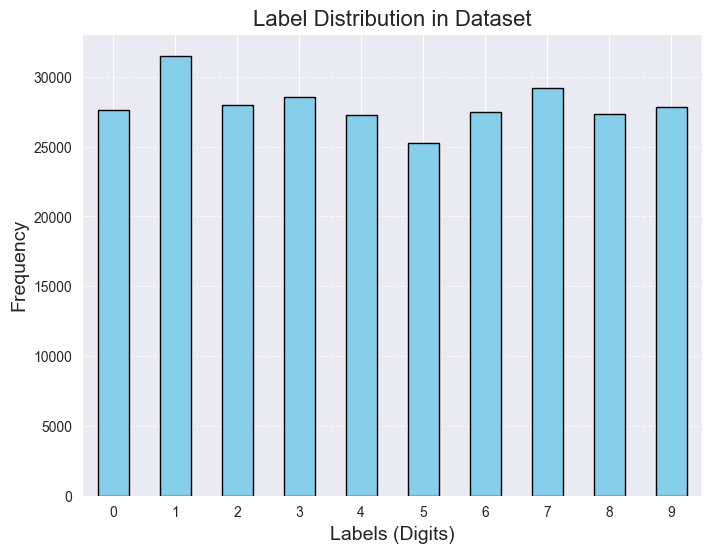

In [23]:
# Step 3: Label Distribution
print("\nLabel Distribution:")
label_distribution = df_processed['label'].value_counts()

print(label_distribution)

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
label_distribution.sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Label Distribution in Dataset", fontsize=16)
plt.xlabel("Labels (Digits)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


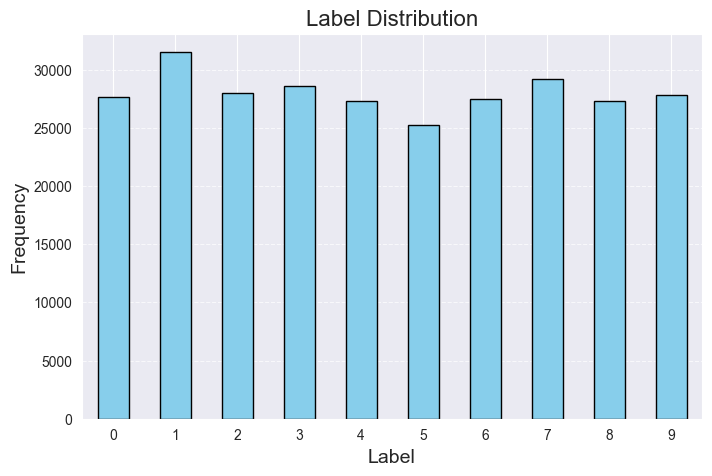

In [24]:
# Visualize Label Distribution
plt.figure(figsize=(8, 5))
label_distribution.sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Label Distribution', fontsize=16)
plt.xlabel('Label', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


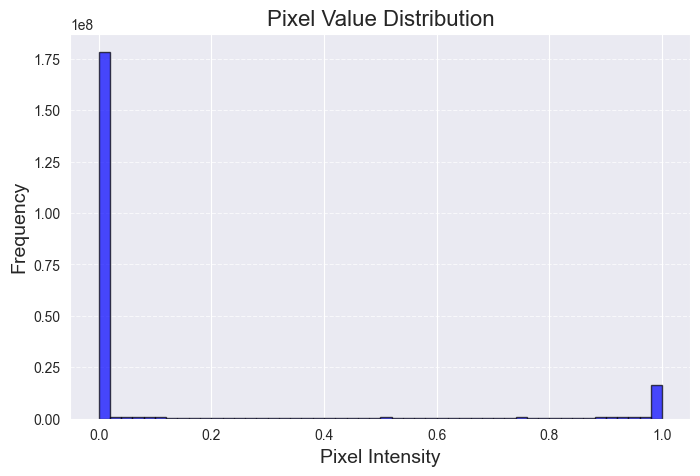

In [25]:
# Step 4: Pixel Value Distribution
pixel_values = df_processed[pixel_columns].values.flatten()

plt.figure(figsize=(8, 5))
plt.hist(pixel_values, bins=50, color='blue', edgecolor='black', alpha=0.7)
plt.title('Pixel Value Distribution', fontsize=16)
plt.xlabel('Pixel Intensity', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



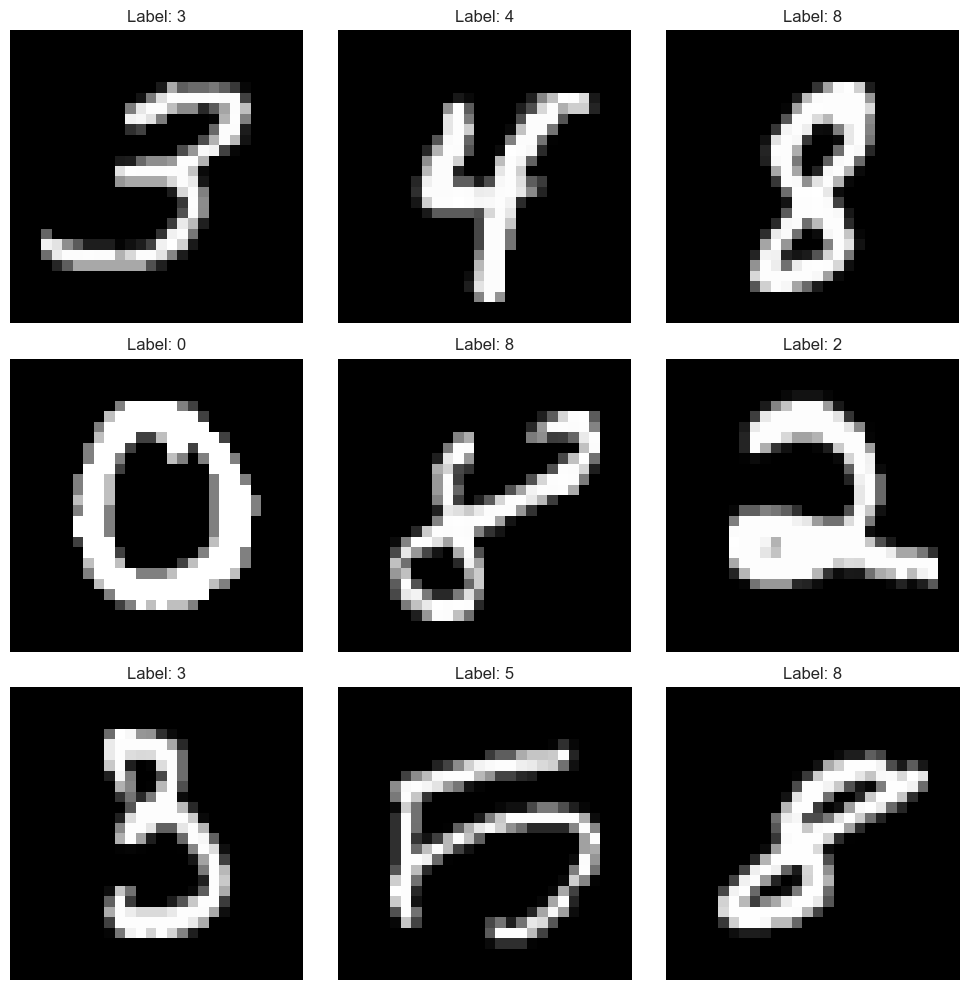

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    random_row = df_processed.sample(1)
    label = random_row['label'].values[0]
    image = random_row[pixel_columns].values.reshape(28, 28)
    plt.imshow(image, cmap='gray')
    plt.title(f"Label: {label}", fontsize=12)
    plt.axis('off')
plt.tight_layout()
plt.show()


Convert pixels Column to Flattened numpy.ndarray

In [27]:
import numpy as np

pixel_columns = [col for col in df_processed.columns if 'pixel' in col]
X = df_processed[pixel_columns].values
y = df_processed['label'].values

# Validate the shapes of features (X) and labels (y)
print("Shape of X (features):", X.shape)
print("Shape of y (labels):", y.shape)

print("\nFirst row of X (features):", X[0])
print("First element of y (label):", y[0])


Shape of X (features): (280000, 784)
Shape of y (labels): (280000,)

First row of X (features): [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.     

Perform Train-Test Split

In [30]:
from sklearn.model_selection import train_test_split
import numpy as np

# Perform stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Validate the shapes of the splits
print("Training Data Shape (X_train, y_train):", X_train.shape, y_train.shape)
print("Testing Data Shape (X_test, y_test):", X_test.shape, y_test.shape)

unique, train_counts = np.unique(y_train, return_counts=True)
print("\nLabel Distribution in Training Set:")
print(dict(zip(unique, train_counts)))

unique, test_counts = np.unique(y_test, return_counts=True)
print("\nLabel Distribution in Testing Set:")
print(dict(zip(unique, test_counts)))


Training Data Shape (X_train, y_train): (224000, 784) (224000,)
Testing Data Shape (X_test, y_test): (56000, 784) (56000,)

Label Distribution in Training Set:
{np.int64(0): np.int64(22090), np.int64(1): np.int64(25206), np.int64(2): np.int64(22368), np.int64(3): np.int64(22851), np.int64(4): np.int64(21837), np.int64(5): np.int64(20202), np.int64(6): np.int64(22003), np.int64(7): np.int64(23337), np.int64(8): np.int64(21840), np.int64(9): np.int64(22266)}

Label Distribution in Testing Set:
{np.int64(0): np.int64(5522), np.int64(1): np.int64(6302), np.int64(2): np.int64(5592), np.int64(3): np.int64(5713), np.int64(4): np.int64(5459), np.int64(5): np.int64(5050), np.int64(6): np.int64(5501), np.int64(7): np.int64(5835), np.int64(8): np.int64(5460), np.int64(9): np.int64(5566)}


Verify Normalization


In [31]:
# Check pixel value range in X_train and X_test
print("Minimum pixel value in X_train:", X_train.min())
print("Maximum pixel value in X_train:", X_train.max())
print("Minimum pixel value in X_test:", X_test.min())
print("Maximum pixel value in X_test:", X_test.max())


Minimum pixel value in X_train: 0.0
Maximum pixel value in X_train: 1.0
Minimum pixel value in X_test: 0.0
Maximum pixel value in X_test: 1.0


Dagshub and ML flow


In [23]:
import os
import mlflow

# Set environment variables for MLFlow
os.environ["MLFLOW_TRACKING_USERNAME"] = "siddhisu"
os.environ["MLFLOW_TRACKING_PASSWORD"] = "91cb0e6609ab34d200cd807562650752c51801d1"

# Set the tracking URI to your DagsHub repository
mlflow.set_tracking_uri("https://dagshub.com/siddhisu/mnist-digit-recognition.mlflow")

if mlflow.active_run():
    print(f"Ending active run: {mlflow.active_run().info.run_id}")
    mlflow.end_run()

# Start a new MLFlow run
with mlflow.start_run(run_name="Test Experiment"):
    mlflow.log_param("test_param", "value")

    mlflow.log_metric("test_accuracy", 0.99)

    print("Test experiment logged successfully.")


Test experiment logged successfully.
🏃 View run Test Experiment at: https://dagshub.com/siddhisu/mnist-digit-recognition.mlflow/#/experiments/0/runs/0a2e36146b254187b1f1498033accbd9
🧪 View experiment at: https://dagshub.com/siddhisu/mnist-digit-recognition.mlflow/#/experiments/0


Create a pipeline with preprocessing and Logistic Regression


Fitting 3 folds for each of 5 candidates, totalling 15 fits


2024/12/20 16:13:29 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged metrics to MLFlow.
🏃 View run incongruous-jay-494 at: https://dagshub.com/siddhisu/mnist-digit-recognition.mlflow/#/experiments/2/runs/6b70dcd66ba6427f8fa08b0510a41115
🧪 View experiment at: https://dagshub.com/siddhisu/mnist-digit-recognition.mlflow/#/experiments/2
Cross-Validation F1-Score: Mean=0.9333, Std=0.0015
Accuracy on Test Set: 0.9358809523809524

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      4142
           1       0.96      0.98      0.97      4726
           2       0.94      0.92      0.93      4194
           3       0.92      0.91      0.91      4285
           4       0.94      0.94      0.94      4094
           5       0.90      0.90      0.90      3788
           6       0.96      0.97      0.96      4125
           7       0.95      0.94      0.95      4376
           8       0.90      0.90      0.90      4095
           9       0.92      0.92      0.92      4175

    accuracy  

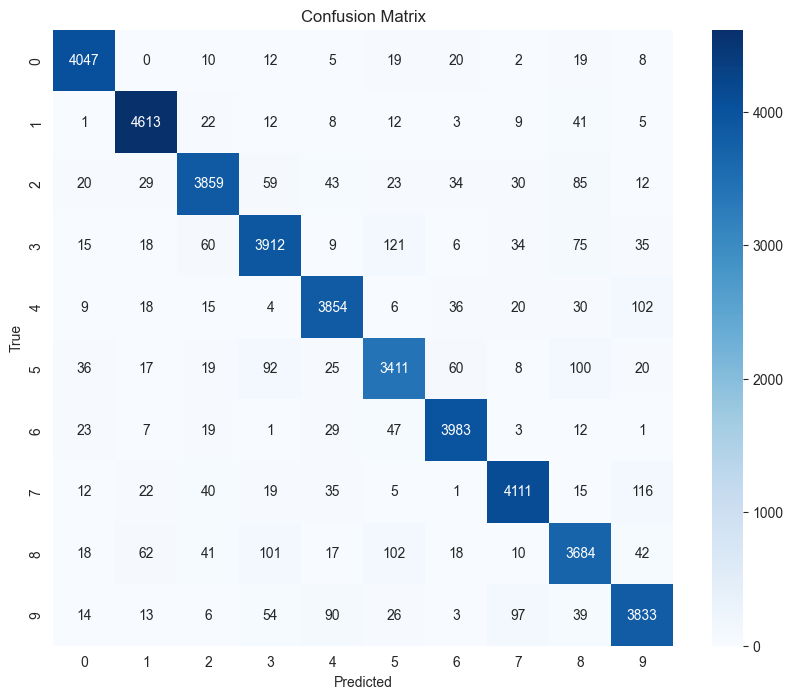

In [24]:
import mlflow
import mlflow.sklearn
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

if mlflow.active_run():
    mlflow.end_run()

# Create a pipeline with preprocessing and Logistic Regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('log_reg', LogisticRegression(max_iter=1000, random_state=42))
])

# Perform 10-fold cross-validation
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=10, scoring='f1_macro')
mean_cv_f1, std_cv_f1 = cv_scores.mean(), cv_scores.std()

# Perform hyperparameter tuning using GridSearchCV
param_grid = {
    'log_reg__C': [0.01, 0.1, 1, 10, 100],
}
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='f1_macro', verbose=1)
grid_search.fit(X_train, y_train)

best_pipeline = grid_search.best_estimator_
y_pred = best_pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')

# Log results in MLFlow
mlflow.set_experiment("Experiment_1_Logistic_Regression")
with mlflow.start_run():
    mlflow.log_param("Model", "Logistic Regression")
    mlflow.log_param("Best Params", grid_search.best_params_)
    mlflow.log_metric("Accuracy", accuracy)
    mlflow.log_metric("F1_Score_Test", f1)
    mlflow.log_metric("CV_Mean_F1_Score", mean_cv_f1)
    mlflow.log_metric("CV_Std_F1_Score", std_cv_f1)
    mlflow.sklearn.log_model(best_pipeline, "model")
    print("Logged metrics to MLFlow.")

print(f"Cross-Validation F1-Score: Mean={mean_cv_f1:.4f}, Std={std_cv_f1:.4f}")
print("Accuracy on Test Set:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


RidgeClassifier pipeline


2024/12/20 16:14:56 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged Ridge Classifier metrics to MLFlow.
🏃 View run silent-grouse-455 at: https://dagshub.com/siddhisu/mnist-digit-recognition.mlflow/#/experiments/3/runs/b8957c0666cc4a6baeb3d664eca67bb8
🧪 View experiment at: https://dagshub.com/siddhisu/mnist-digit-recognition.mlflow/#/experiments/3
RidgeClassifier - Cross-Validation F1-Score: Mean=0.8541, Std=0.0016
RidgeClassifier - Accuracy on Test Set: 0.8524

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93      4142
           1       0.82      0.97      0.89      4726
           2       0.91      0.80      0.85      4194
           3       0.83      0.84      0.83      4285
           4       0.83      0.89      0.86      4094
           5       0.86      0.72      0.78      3788
           6       0.89      0.92      0.90      4125
           7       0.87      0.86      0.86      4376
           8       0.84      0.75      0.79      4095
           9       0.80      0

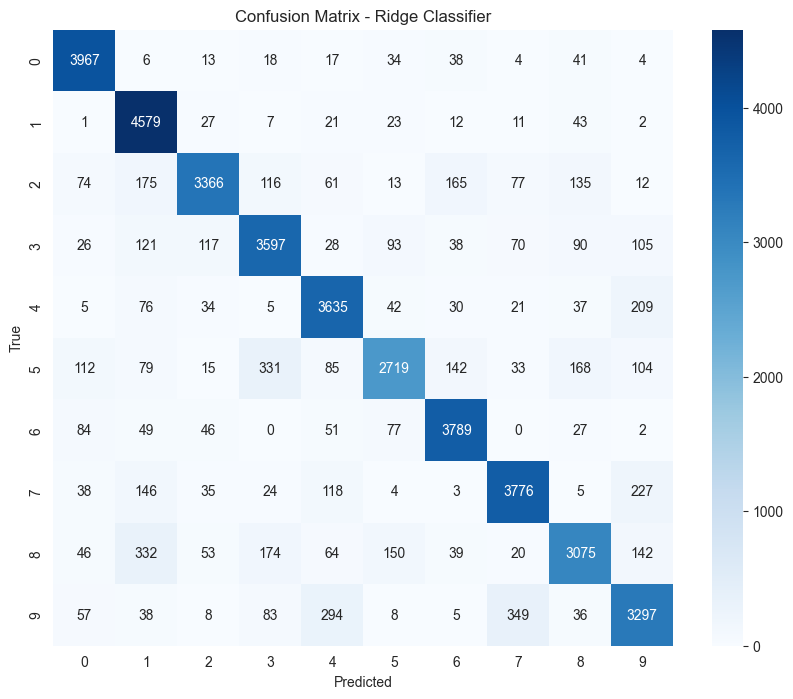

In [25]:
from sklearn.linear_model import RidgeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import mlflow

if mlflow.active_run():
    mlflow.end_run()

# RidgeClassifier pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', RidgeClassifier())
])

# Perform 10-fold cross-validation
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=10, scoring='f1_macro')
mean_cv_f1, std_cv_f1 = cv_scores.mean(), cv_scores.std()

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# Calculate accuracy and F1-score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')

# Log results in MLFlow
mlflow.set_experiment("Experiment_2_RidgeClassifier")
with mlflow.start_run():
    mlflow.log_param("Model", "Ridge Classifier")
    mlflow.log_metric("Accuracy", accuracy)
    mlflow.log_metric("F1_Score_Test", f1)
    mlflow.log_metric("CV_Mean_F1_Score", mean_cv_f1)
    mlflow.log_metric("CV_Std_F1_Score", std_cv_f1)
    mlflow.sklearn.log_model(pipeline, "model")
    print("Logged Ridge Classifier metrics to MLFlow.")

print(f"RidgeClassifier - Cross-Validation F1-Score: Mean={mean_cv_f1:.4f}, Std={std_cv_f1:.4f}")
print(f"RidgeClassifier - Accuracy on Test Set: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title("Confusion Matrix - Ridge Classifier")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


Random Forest pipeline


Fitting 3 folds for each of 27 candidates, totalling 81 fits


2024/12/20 19:25:13 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged Random Forest metrics to MLFlow.
🏃 View run sincere-panda-125 at: https://dagshub.com/siddhisu/mnist-digit-recognition.mlflow/#/experiments/5/runs/59081a54c5c5405284ad9eec27af128a
🧪 View experiment at: https://dagshub.com/siddhisu/mnist-digit-recognition.mlflow/#/experiments/5
Random Forest - Cross-Validation F1-Score: Mean=0.9979, Std=0.0004
Random Forest - Accuracy on Test Set: 0.9986

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4142
           1       1.00      1.00      1.00      4726
           2       1.00      1.00      1.00      4194
           3       1.00      1.00      1.00      4285
           4       1.00      1.00      1.00      4094
           5       1.00      1.00      1.00      3788
           6       1.00      1.00      1.00      4125
           7       1.00      1.00      1.00      4376
           8       1.00      1.00      1.00      4095
           9       1.00      1.00    

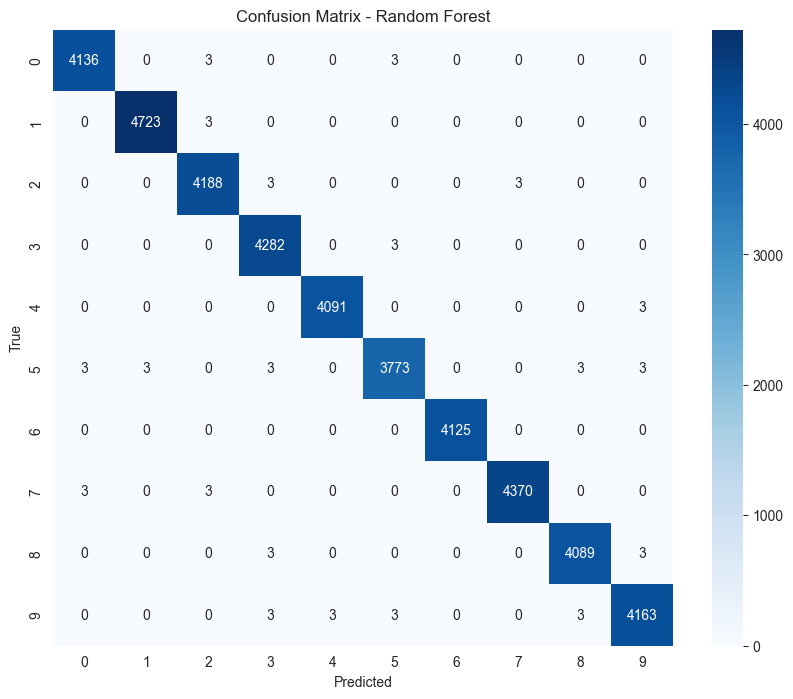

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import mlflow
import mlflow.sklearn
import matplotlib.pyplot as plt
import seaborn as sns

if mlflow.active_run():
    mlflow.end_run()

# Random Forest pipeline
pipeline = Pipeline([
    ('classifier', RandomForestClassifier(random_state=42))
])

# Hyperparameter tuning for Random Forest
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [10, 20, None],
    'classifier__min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='f1_macro', verbose=1)
grid_search.fit(X_train, y_train)
best_pipeline = grid_search.best_estimator_
best_params = grid_search.best_params_

# Perform 10-fold cross-validation
cv_scores = cross_val_score(best_pipeline, X_train, y_train, cv=10, scoring='f1_macro')
mean_cv_f1, std_cv_f1 = cv_scores.mean(), cv_scores.std()

y_pred = best_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')

mlflow.set_experiment("Experiment_2_RandomForest")
with mlflow.start_run():
    mlflow.log_param("Model", "Random Forest")
    mlflow.log_param("Best Params", best_params)
    mlflow.log_metric("Accuracy", accuracy)
    mlflow.log_metric("F1_Score_Test", f1)
    mlflow.log_metric("CV_Mean_F1_Score", mean_cv_f1)
    mlflow.log_metric("CV_Std_F1_Score", std_cv_f1)
    mlflow.sklearn.log_model(best_pipeline, "model")
    print("Logged Random Forest metrics to MLFlow.")

print(f"Random Forest - Cross-Validation F1-Score: Mean={mean_cv_f1:.4f}, Std={std_cv_f1:.4f}")
print(f"Random Forest - Accuracy on Test Set: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


Comparing Model Performances Across Experiments


In [7]:
import mlflow
import pandas as pd

# Connect to your MLFlow tracking server
mlflow.set_tracking_uri("https://dagshub.com/siddhisu/mnist-digit-recognition.mlflow")

experiments = [
    "Experiment_1_Logistic_Regression",
    "Experiment_2_RandomForest",
    "Experiment_2_RidgeClassifier",
]

model_performance = []

for experiment_name in experiments:
    experiment = mlflow.get_experiment_by_name(experiment_name)
    if experiment:
        experiment_id = experiment.experiment_id
        runs = mlflow.search_runs(experiment_ids=[experiment_id], order_by=["metrics.Accuracy DESC"])
        for _, run in runs.iterrows():
            model_performance.append({
                "Experiment": experiment_name,
                "Run Name": run['tags.mlflow.runName'],
                "Accuracy": run['metrics.Accuracy'],
                "F1-Score (Test)": run['metrics.F1_Score_Test'],
                "CV Mean F1-Score": run['metrics.CV_Mean_F1_Score'],
                "CV Std F1-Score": run['metrics.CV_Std_F1_Score'],
                "Best Params": run['params.Best Params'] if 'params.Best Params' in run else None
            })

performance_df = pd.DataFrame(model_performance)

print(performance_df)


                         Experiment             Run Name  Accuracy  \
0  Experiment_1_Logistic_Regression  incongruous-jay-494  0.935881   
1  Experiment_1_Logistic_Regression   bittersweet-ant-96  0.932143   
2  Experiment_1_Logistic_Regression      zealous-fox-913  0.929388   
3  Experiment_1_Logistic_Regression       bright-hen-970  0.927857   
4         Experiment_2_RandomForest    sincere-panda-125  0.998571   
5         Experiment_2_RandomForest      polite-goat-183  0.977551   
6      Experiment_2_RidgeClassifier  legendary-trout-845  0.853367   
7      Experiment_2_RidgeClassifier     abrasive-auk-186  0.853367   
8      Experiment_2_RidgeClassifier     Ridge Classifier  0.853367   
9      Experiment_2_RidgeClassifier    silent-grouse-455  0.852381   

   F1-Score (Test)  CV Mean F1-Score  CV Std F1-Score  \
0         0.935072          0.933259         0.001509   
1         0.931239          0.929033         0.002629   
2         0.928764               NaN              NaN   
3

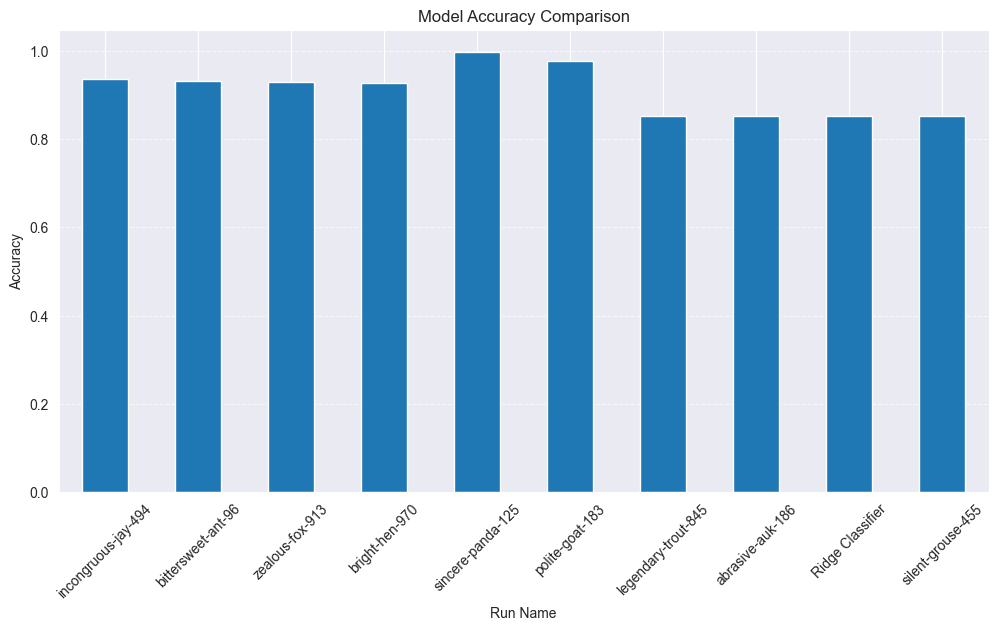

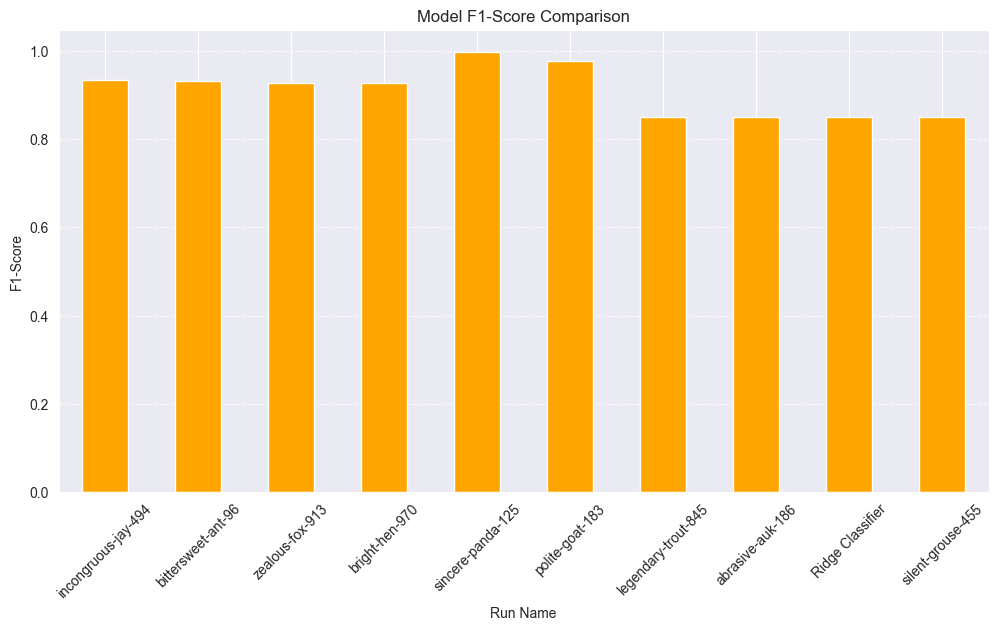

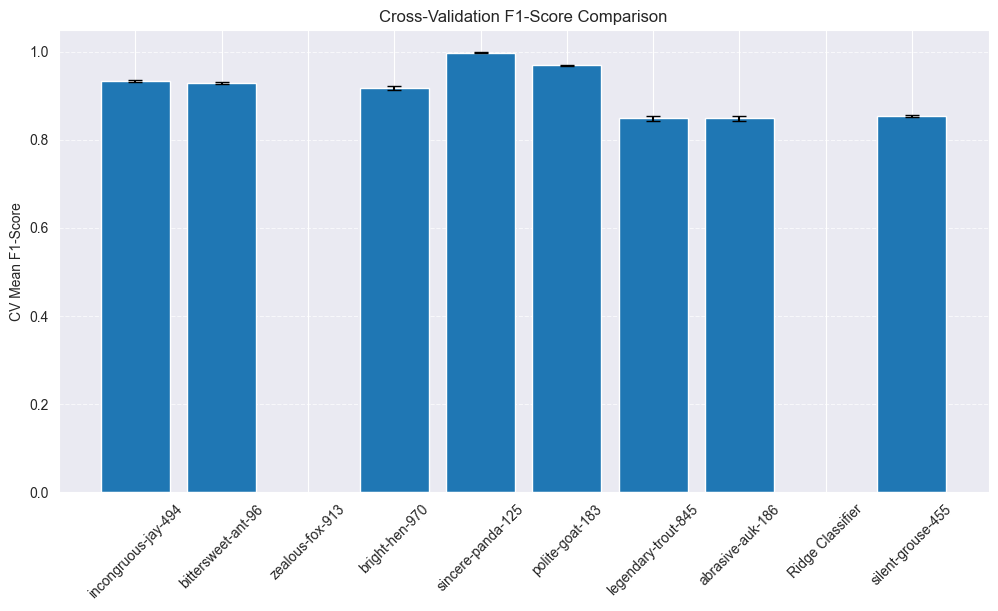

In [60]:
import matplotlib.pyplot as plt

# Plot Accuracy
performance_df.plot(x='Run Name', y='Accuracy', kind='bar', figsize=(12, 6), legend=False)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot F1-Score
performance_df.plot(x='Run Name', y='F1-Score (Test)', kind='bar', figsize=(12, 6), color='orange', legend=False)
plt.title("Model F1-Score Comparison")
plt.ylabel("F1-Score")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot CV Mean F1-Score with Std Error
plt.figure(figsize=(12, 6))
plt.bar(performance_df['Run Name'], performance_df['CV Mean F1-Score'], yerr=performance_df['CV Std F1-Score'], capsize=5)
plt.title("Cross-Validation F1-Score Comparison")
plt.ylabel("CV Mean F1-Score")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


PCA


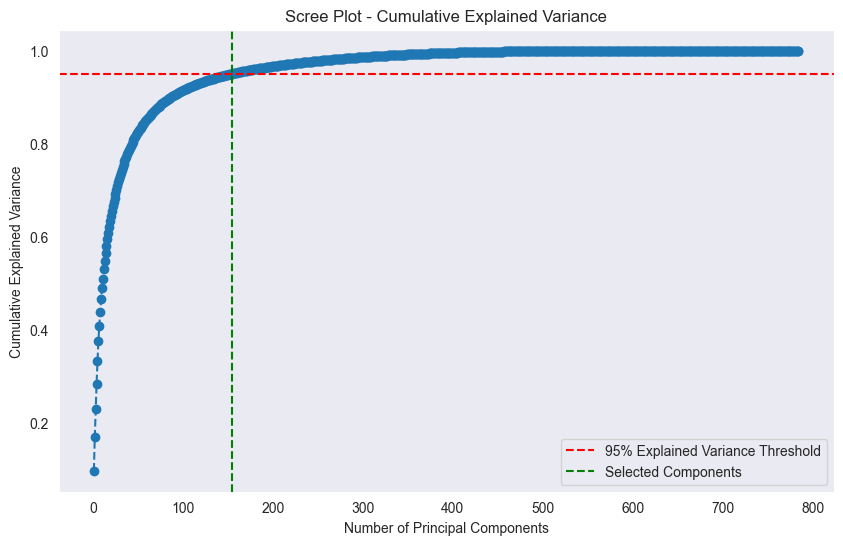

Number of components explaining 95% variance: 154
Reduced training data shape: (224000, 154)
Reduced testing data shape: (56000, 154)


In [34]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Perform PCA on the training data
pca = PCA()
X_pca = pca.fit_transform(X_train)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Create a scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='--')
plt.title('Scree Plot - Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Explained Variance Threshold')
plt.axvline(x=np.argmax(cumulative_variance_ratio >= 0.95) + 1, color='g', linestyle='--', label='Selected Components')
plt.legend()
plt.grid()
plt.show()

# Determine the number of components explaining ~95% variance
n_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1
print(f"Number of components explaining 95% variance: {n_components}")

# Perform PCA with the selected number of components
pca_reduced = PCA(n_components=n_components)
X_train_reduced = pca_reduced.fit_transform(X_train)
X_test_reduced = pca_reduced.transform(X_test)

# Print the shape of the reduced data
print(f"Reduced training data shape: {X_train_reduced.shape}")
print(f"Reduced testing data shape: {X_test_reduced.shape}")


Code for Training and Evaluation on PCA-Reduced Data


In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
import pandas as pd

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Ridge Classifier": RidgeClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
}

results = []
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_reduced, y_train)
    y_pred = model.predict(X_test_reduced)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    report = classification_report(y_test, y_pred, output_dict=True)

    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "F1-Score": f1,
        "Precision": report["weighted avg"]["precision"],
        "Recall": report["weighted avg"]["recall"],
    })

    print(f"{name} - Accuracy: {accuracy:.4f}, F1-Score: {f1:.4f}")

results_df = pd.DataFrame(results)
print("\nPerformance on PCA-Reduced Data:")
print(results_df)

results_df.to_csv("pca_reduced_model_performance.csv", index=False)


Training Logistic Regression...
Logistic Regression - Accuracy: 0.9268, F1-Score: 0.9257
Training Ridge Classifier...
Ridge Classifier - Accuracy: 0.8547, F1-Score: 0.8520
Training Random Forest...
Random Forest - Accuracy: 0.9999, F1-Score: 0.9999
Training XGBoost...


/Users/rishimule/miniconda3/envs/PythonProject/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [10:52:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost - Accuracy: 0.9999, F1-Score: 0.9999

Performance on PCA-Reduced Data:
                 Model  Accuracy  F1-Score  Precision    Recall
0  Logistic Regression  0.926821  0.925748   0.926612  0.926821
1     Ridge Classifier  0.854714  0.851964   0.855762  0.854714
2        Random Forest  0.999929  0.999928   0.999929  0.999929
3              XGBoost  0.999929  0.999928   0.999929  0.999929


Code for Experiment 7: Robustness Testing with Noise



Training Logistic Regression on noisy data...
Logistic Regression - Accuracy: 0.9246, F1-Score: 0.9235
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      5522
           1       0.95      0.98      0.96      6302
           2       0.93      0.90      0.91      5592
           3       0.91      0.89      0.90      5713
           4       0.92      0.93      0.93      5459
           5       0.89      0.87      0.88      5050
           6       0.94      0.96      0.95      5501
           7       0.94      0.94      0.94      5835
           8       0.90      0.88      0.89      5460
           9       0.90      0.90      0.90      5566

    accuracy                           0.92     56000
   macro avg       0.92      0.92      0.92     56000
weighted avg       0.92      0.92      0.92     56000



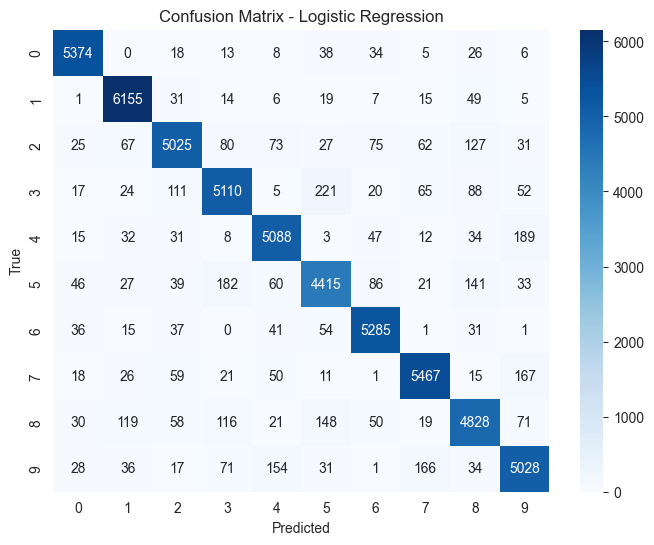

Training Random Forest on noisy data...
Random Forest - Accuracy: 0.9840, F1-Score: 0.9839
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5522
           1       0.99      0.99      0.99      6302
           2       0.98      0.99      0.98      5592
           3       0.98      0.98      0.98      5713
           4       0.98      0.98      0.98      5459
           5       0.99      0.98      0.99      5050
           6       0.99      0.99      0.99      5501
           7       0.98      0.98      0.98      5835
           8       0.99      0.97      0.98      5460
           9       0.97      0.97      0.97      5566

    accuracy                           0.98     56000
   macro avg       0.98      0.98      0.98     56000
weighted avg       0.98      0.98      0.98     56000



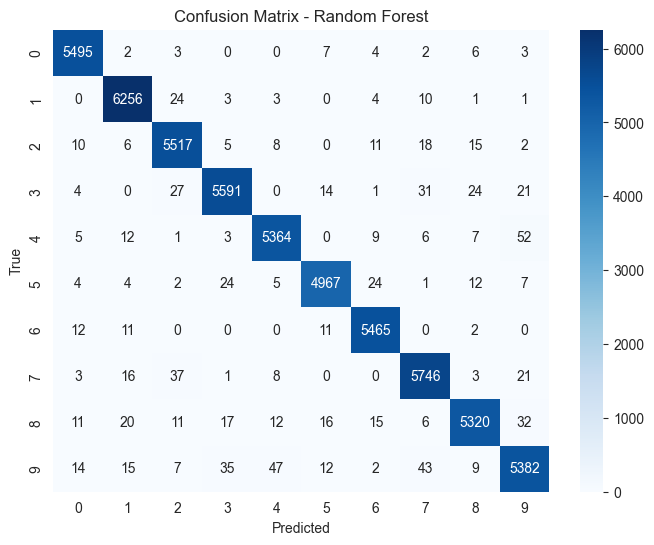

Training XGBoost on noisy data...


/Users/rishimule/miniconda3/envs/PythonProject/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:34:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost - Accuracy: 0.9910, F1-Score: 0.9910
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      5522
           1       0.99      0.99      0.99      6302
           2       0.99      0.99      0.99      5592
           3       0.99      0.99      0.99      5713
           4       0.99      0.99      0.99      5459
           5       0.99      0.99      0.99      5050
           6       1.00      1.00      1.00      5501
           7       0.99      0.99      0.99      5835
           8       0.99      0.98      0.99      5460
           9       0.98      0.98      0.98      5566

    accuracy                           0.99     56000
   macro avg       0.99      0.99      0.99     56000
weighted avg       0.99      0.99      0.99     56000



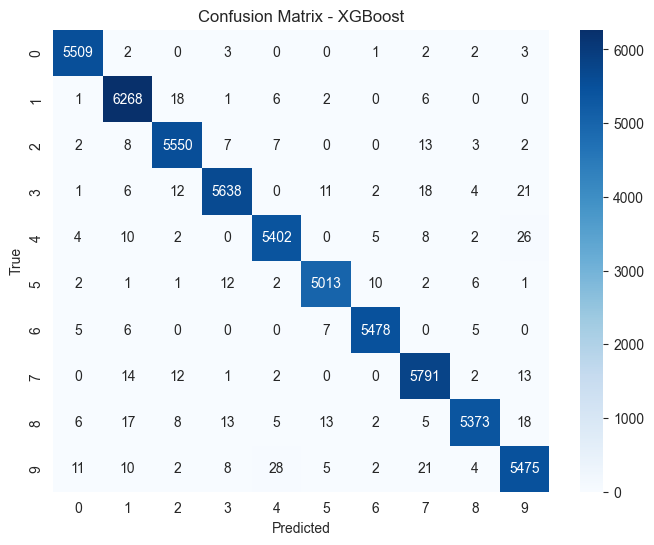

Performance on Noisy Data:
                 Model  Accuracy  F1-Score
0  Logistic Regression  0.924554  0.923467
1        Random Forest  0.983982  0.983931
2              XGBoost  0.991018  0.991039


In [42]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def add_noise(X, noise_level=0.1):
    noise = np.random.normal(0, noise_level, X.shape)
    return X + noise

X_train_noisy = add_noise(X_train, noise_level=0.2)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

results = []
for name, model in models.items():
    print(f"Training {name} on noisy data...")
    model.fit(X_train_noisy, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    results.append({"Model": name, "Accuracy": accuracy, "F1-Score": f1})

    print(f"{name} - Accuracy: {accuracy:.4f}, F1-Score: {f1:.4f}")
    print(classification_report(y_test, y_pred))

    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

import pandas as pd
results_df = pd.DataFrame(results)
print("Performance on Noisy Data:")
print(results_df)


In [46]:
print(f"Training Data Shape: {X_train.shape}, Labels Shape: {y_train.shape}")


Training Data Shape: (224000, 784), Labels Shape: (224000,)


In [53]:
# Logistic Regression
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)
log_reg_model.fit(X_train, y_train)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)


/Users/rishimule/miniconda3/envs/PythonProject/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:09:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rishimule/miniconda3/envs/PythonProject/lib/python3.11/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The XGBClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [54]:
y_pred_log_reg = log_reg_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)


In [55]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Logistic Regression
acc_log_reg = accuracy_score(y_test, y_pred_log_reg)
f1_log_reg = f1_score(y_test, y_pred_log_reg, average='macro')
print(f"Logistic Regression - Accuracy: {acc_log_reg}, F1-Score: {f1_log_reg}")
print(classification_report(y_test, y_pred_log_reg))

# Random Forest
acc_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, average='macro')
print(f"Random Forest - Accuracy: {acc_rf}, F1-Score: {f1_rf}")
print(classification_report(y_test, y_pred_rf))

# XGBoost
acc_xgb = accuracy_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb, average='macro')
print(f"XGBoost - Accuracy: {acc_xgb}, F1-Score: {f1_xgb}")
print(classification_report(y_test, y_pred_xgb))



Logistic Regression - Accuracy: 0.9366607142857143, F1-Score: 0.9357664436750888
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      5522
           1       0.96      0.98      0.97      6302
           2       0.94      0.92      0.93      5592
           3       0.92      0.91      0.92      5713
           4       0.94      0.94      0.94      5459
           5       0.91      0.90      0.90      5050
           6       0.96      0.97      0.96      5501
           7       0.95      0.95      0.95      5835
           8       0.91      0.90      0.90      5460
           9       0.91      0.92      0.91      5566

    accuracy                           0.94     56000
   macro avg       0.94      0.94      0.94     56000
weighted avg       0.94      0.94      0.94     56000

Random Forest - Accuracy: 1.0, F1-Score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5522
      

In [56]:
print(f"Training Data Shape: {X_train.shape}, {y_train.shape}")
print(f"Test Data Shape: {X_test.shape}, {y_test.shape}")


Training Data Shape: (224000, 784), (224000,)
Test Data Shape: (56000, 784), (56000,)


In [57]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(log_reg_model, X_train, y_train, cv=5, scoring='accuracy')
print(f"Logistic Regression CV Accuracy: {scores.mean()}")


Logistic Regression CV Accuracy: 0.9343214285714285


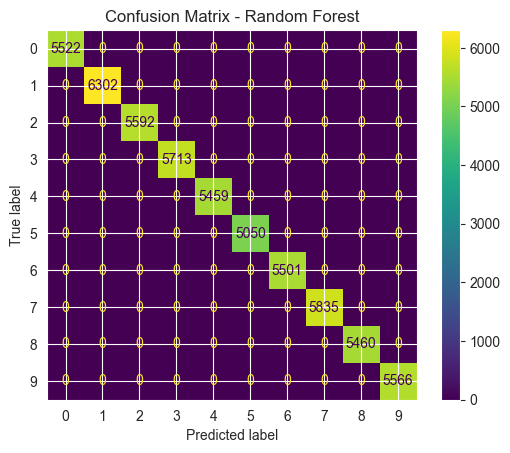

/Users/rishimule/miniconda3/envs/PythonProject/lib/python3.11/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The XGBClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


AttributeError: 'super' object has no attribute '__sklearn_tags__'

In [59]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test)
plt.title("Confusion Matrix - Random Forest")
plt.show()

ConfusionMatrixDisplay.from_estimator(xgb_model, X_test, y_test)
plt.title("Confusion Matrix - XGBoost")
plt.show()
